In [1]:
pip install tensorflow keras matplotlib numpy pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing Required Packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Loading and Pre-processing the Image Data from file system
# Assuming last column in CSV is the label, others are pixel values
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

# Extract pixel data and labels
# x_train = train_df.iloc[:, :-1].values
# y_train = train_df.iloc[:, -1].values
# x_test = test_df.iloc[:, :-1].values
# y_test = test_df.iloc[:, -1].values

y_train = train_df.iloc[:, 0].values
x_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values

# Reshape pixel data to 28x28x1 for grayscale images
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert to float32 and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Shape of Training :", x_train.shape)
print("Shape of Testing  :", x_test.shape)

input_shape = (28, 28, 1)

Shape of Training : (60000, 28, 28, 1)
Shape of Testing  : (10000, 28, 28, 1)


In [4]:
# Defining the Model's Architecture
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.summary()


C:\Users\vaish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         946,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Training the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.9391 - loss: 0.2031
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9747 - loss: 0.0838


In [6]:
# Estimating the Model's Performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9818 - loss: 0.0585
Loss=0.059
Accuracy=0.982


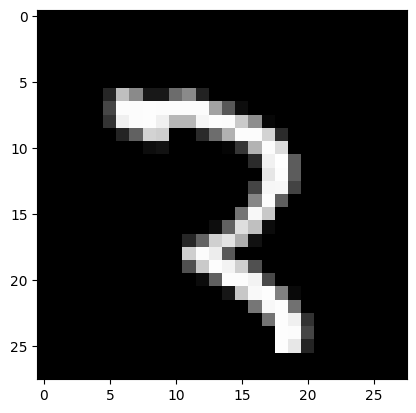

In [7]:
# Showing image at position 0 from dataset
image = x_train[500]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [8]:
# Predicting the class of image
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict(image)
print("Predicted class: {}".format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Predicted class: 2
